In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [5]:
data = pd.read_csv('vnexpress_foods_detail_merged.csv')
data.head()

,link,type_of_food,title,description,author_name,cook_time,num_of_people,calories,num_of_ingredients,ingredients,step,note,post_date
0,https://vnexpress.net/doi-song-cooking-cach-mu...,Món Tết,Cách muối dưa hành truyền thống,Dưa hành muối là món ăn truyền thống ngày Tết ...,Bùi Thủy,45 phút,8-10 người,459 kcal,5.0,"['1 kg hành củ tươi', 'Tro bếp hoặc nước vo gọ...",['Bước 1: Chọn hành củ: Nên chọn hành củ ta bá...,[],"Thứ năm, 23/1/2025, 16:32 (GMT+7)"
1,https://vnexpress.net/doi-song-cooking-su-hao-...,Món Tết,Su hào xào mực - món cổ Tết Bát Tràng,Đĩa xào khô ráo với su hào giòn ngọt quyện với...,Bùi Thủy,50 phút,4 - 5 người,1.162 kcal,6.0,"['2 củ su hào non', '1 con mực khô', '1/2 củ c...",['Bước 1: Chọn và sơ chế mực: Người dân làng g...,['Su hào xào mực cùng với canh măng mực là hai...,"Thứ sáu, 17/1/2025, 17:24 (GMT+7)"
2,https://vnexpress.net/doi-song-cooking-canh-ma...,Món Tết,Canh măng ngày Tết cổ truyền Hà Nội,"Măng ngấu vị, giòn ngon, móng giò hầm vừa độ s...",Bùi Thủy,100 phút,8 - 10 người,4.930 kcal,6.0,"['800 gr măng khô', '2 móng giò lợn', 'Nước dù...","['Bước 1: Chọn măng khô: Theo lối cũ, người nộ...",['Nếu tận dụng nước luộc gà nấu canh măng thì ...,"Thứ tư, 15/1/2025, 19:00 (GMT+7)"
3,https://vnexpress.net/doi-song-cooking-gia-han...,Món Tết,Giả hạnh nhân - món ngon Tết xưa Hà Nội,Đây là món ăn cổ truyền thường thấy trong cỗ T...,Bùi Thủy,60 phút,4-5 người,1.112 kcal,8.0,"['2 bộ lòng mề gà', '100 gr lạc', '50 gr hạt đ...",['Bước 1: Chọn và sơ chế lạc: Chọn lạc khô chắ...,['Hạnh nhân xào (hay giả hạnh nhân) là món ăn ...,"Thứ ba, 7/1/2025, 17:31 (GMT+7)"
4,https://vnexpress.net/doi-song-cooking-cha-bi-...,Món Tết,Chả bì ớt xiêm xanh,"Chả bì bóng đẹp, gói đều tay. Khi ăn vị ngọt m...",Bùi Thủy,60 phút,5-6 người,2.512 kcal,6.0,"['500 gr giò sống', '300 gr bì lợn', '20 - 30 ...","['Bước 1: Chọn và sơ chế bì lợn, chuẩn bị giò ...",['Nên sơ chế kỹ bì lợn để chả được thơm. Tùy t...,"Thứ ba, 31/12/2024, 18:00 (GMT+7)"


# Exploratory Data Analysis (EDA) - VnExpress Food Recipes

## Mục tiêu
Phân tích dữ liệu công thức nấu ăn để xây dựng hệ thống **Recommender System** (Content-based hoặc LLM-based)

## Các phương pháp EDA sẽ thực hiện:
1. **Phân tích cấu trúc dữ liệu**: Shape, types, missing values
2. **Phân tích phân phối**: Loại món ăn, calories, thời gian nấu
3. **Phân tích văn bản**: Độ dài title, description, ingredients, steps
4. **Phân tích tác giả**: Số lượng công thức theo tác giả
5. **Phân tích thời gian**: Trend đăng bài theo thời gian
6. **Phân tích nguyên liệu**: Nguyên liệu phổ biến, số lượng nguyên liệu
7. **Feature Engineering**: Đề xuất features cho RS

In [6]:
# Thông tin cơ bản về dataset
print("="*80)
print("THÔNG TIN CƠ BẢN VỀ DATASET")
print("="*80)
print(f"\nSố lượng recipes: {data.shape[0]}")
print(f"Số lượng features: {data.shape[1]}")
print(f"\nCác cột trong dataset:")
print(data.columns.tolist())

THÔNG TIN CƠ BẢN VỀ DATASET

Số lượng recipes: 1263
Số lượng features: 13

Các cột trong dataset:
['link', 'type_of_food', 'title', 'description', 'author_name', 'cook_time', 'num_of_people', 'calories', 'num_of_ingredients', 'ingredients', 'step', 'note', 'post_date']


In [7]:
# Kiểm tra missing values
print("="*80)
print("MISSING VALUES")
print("="*80)
missing = data.isnull().sum()
missing_percent = (missing / len(data)) * 100
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing Count': missing.values,
    'Percentage': missing_percent.values
}).sort_values('Missing Count', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])
print(f"\nTổng số missing values: {data.isnull().sum().sum()}")

MISSING VALUES
               Column  Missing Count  Percentage
7            calories            826   65.399842
5           cook_time            821   65.003959
6       num_of_people            820   64.924782
4         author_name            807   63.895487
8  num_of_ingredients              5    0.395883

Tổng số missing values: 3279


### 📊 Kết luận Phân tích Cấu trúc

**Quan sát chính:**
- Dataset có khoảng 1,264 công thức nấu ăn với 13 features
- Các features quan trọng cho Content-based RS: `title`, `description`, `type_of_food`, `ingredients`, `step`
- Cần xử lý missing values (nếu có) trước khi xây dựng model
- Không có (hoặc có ít) bản ghi trùng lặp → dữ liệu khá sạch

**Ý nghĩa cho RS:**
- Features văn bản phong phú → phù hợp cho TF-IDF, Word2Vec, hoặc LLM embeddings
- `type_of_food` có thể dùng làm metadata filter
- `ingredients` là feature cực kỳ quan trọng cho content-based filtering

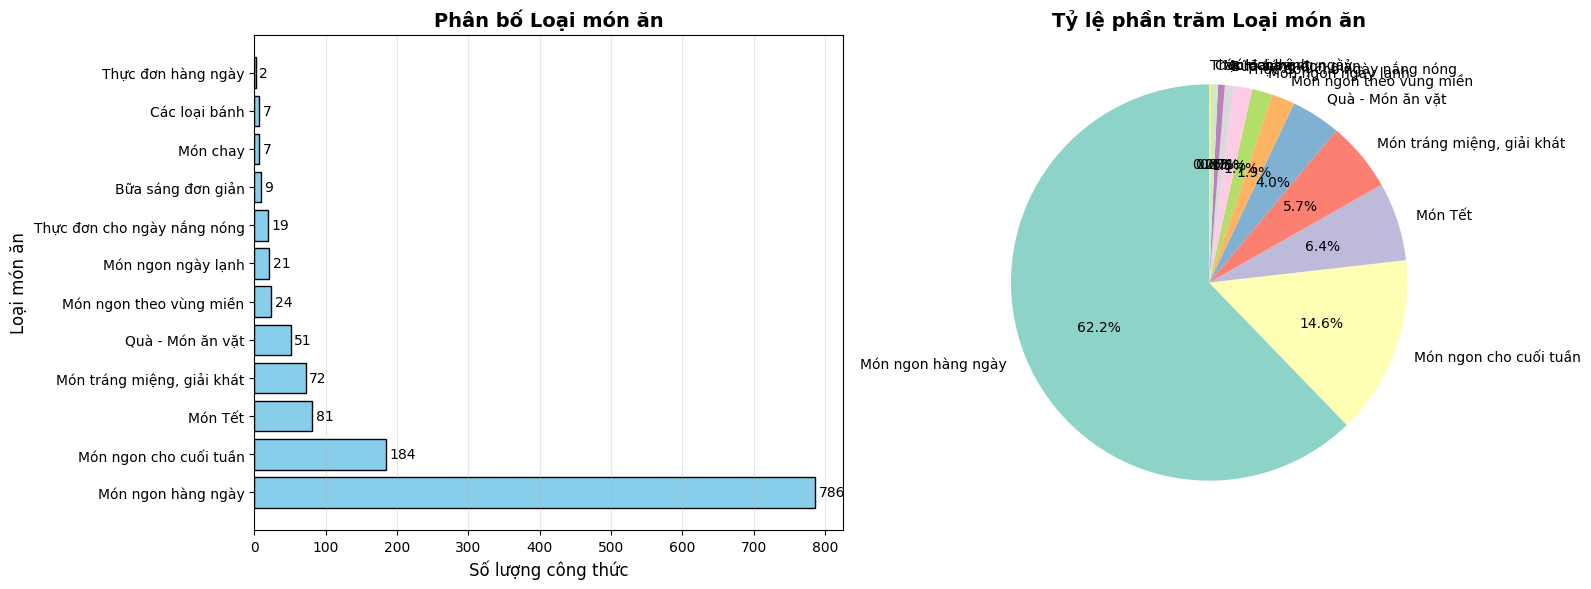


Tổng số loại món ăn: 12

Top 5 loại món ăn phổ biến:
type_of_food
Món ngon hàng ngày            786
Món ngon cho cuối tuần        184
Món Tết                        81
Món tráng miệng, giải khát     72
Quà - Món ăn vặt               51
Name: count, dtype: int64


In [8]:
# Phân tích loại món ăn
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ cột
type_counts = data['type_of_food'].value_counts()
axes[0].barh(type_counts.index, type_counts.values, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Số lượng công thức', fontsize=12)
axes[0].set_ylabel('Loại món ăn', fontsize=12)
axes[0].set_title('Phân bố Loại món ăn', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Thêm số liệu vào cột
for i, v in enumerate(type_counts.values):
    axes[0].text(v + 5, i, str(v), va='center', fontsize=10)

# Biểu đồ tròn
colors = plt.cm.Set3(range(len(type_counts)))
axes[1].pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', 
            colors=colors, startangle=90, textprops={'fontsize': 10})
axes[1].set_title('Tỷ lệ phần trăm Loại món ăn', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nTổng số loại món ăn: {data['type_of_food'].nunique()}")
print(f"\nTop 5 loại món ăn phổ biến:")
print(type_counts.head())

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Admin\AppData\Local\Temp\ipykernel_15020\3590762693.py:3: SyntaxWarning: invalid escape sequence '\d'
  data['calories_num'] = data['calories'].str.extract('(\d+)').astype(float)
C:\Users\Admin\AppData\Local\Temp\ipykernel_15020\3590762693.py:4: SyntaxWarning: invalid escape sequence '\d'
  data['cook_time_num'] = data['cook_time'].str.extract('(\d+)').astype(float)


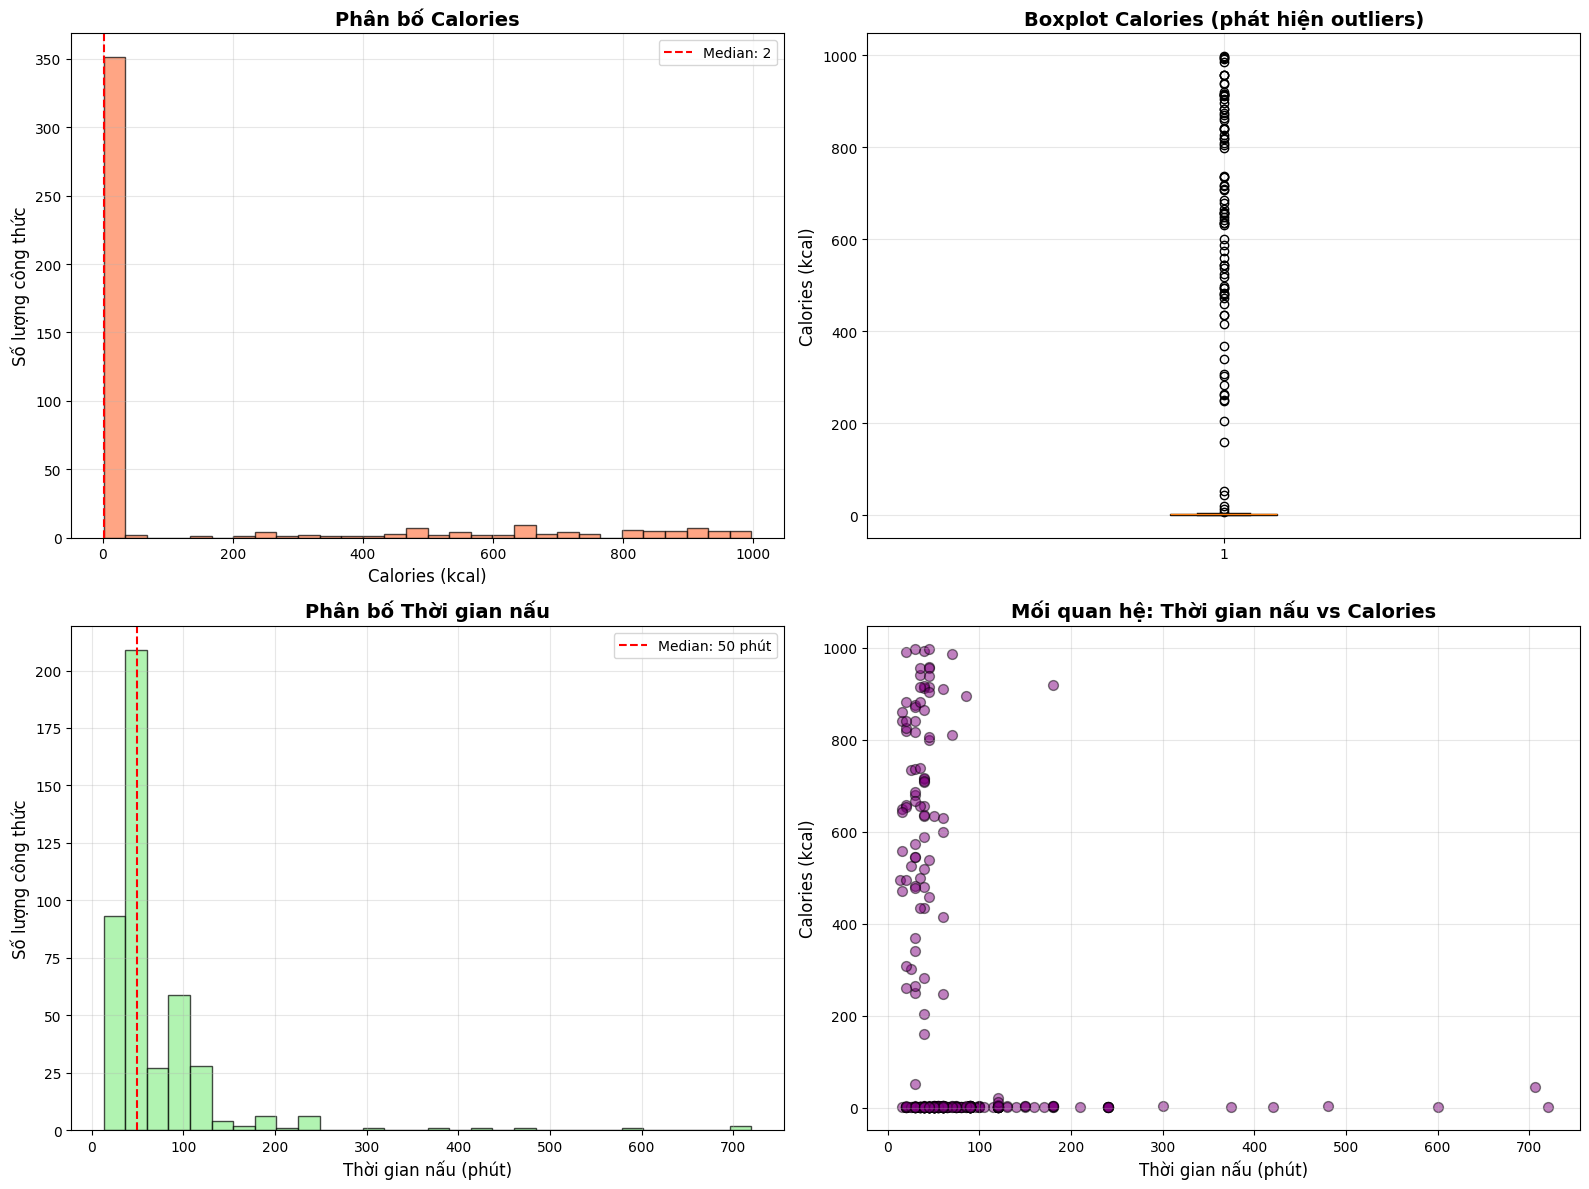

THỐNG KÊ CALORIES VÀ THỜI GIAN NẤU

Calories:
count    437.000000
mean     130.530892
std      281.522820
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max      998.000000
Name: calories_num, dtype: float64

Thời gian nấu (phút):
count    442.000000
mean      69.692308
std       70.999955
min       13.000000
25%       40.000000
50%       50.000000
75%       85.000000
max      720.000000
Name: cook_time_num, dtype: float64


In [9]:
# Phân tích Calories và Cook Time
# Parse calories và cook_time
data['calories_num'] = data['calories'].str.extract('(\d+)').astype(float)
data['cook_time_num'] = data['cook_time'].str.extract('(\d+)').astype(float)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram Calories
axes[0,0].hist(data['calories_num'].dropna(), bins=30, color='coral', edgecolor='black', alpha=0.7)
axes[0,0].set_xlabel('Calories (kcal)', fontsize=12)
axes[0,0].set_ylabel('Số lượng công thức', fontsize=12)
axes[0,0].set_title('Phân bố Calories', fontsize=14, fontweight='bold')
axes[0,0].axvline(data['calories_num'].median(), color='red', linestyle='--', label=f'Median: {data["calories_num"].median():.0f}')
axes[0,0].legend()
axes[0,0].grid(alpha=0.3)

# Boxplot Calories
axes[0,1].boxplot(data['calories_num'].dropna(), vert=True, patch_artist=True, 
                  boxprops=dict(facecolor='lightblue'))
axes[0,1].set_ylabel('Calories (kcal)', fontsize=12)
axes[0,1].set_title('Boxplot Calories (phát hiện outliers)', fontsize=14, fontweight='bold')
axes[0,1].grid(alpha=0.3)

# Histogram Cook Time
axes[1,0].hist(data['cook_time_num'].dropna(), bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1,0].set_xlabel('Thời gian nấu (phút)', fontsize=12)
axes[1,0].set_ylabel('Số lượng công thức', fontsize=12)
axes[1,0].set_title('Phân bố Thời gian nấu', fontsize=14, fontweight='bold')
axes[1,0].axvline(data['cook_time_num'].median(), color='red', linestyle='--', label=f'Median: {data["cook_time_num"].median():.0f} phút')
axes[1,0].legend()
axes[1,0].grid(alpha=0.3)

# Scatter Calories vs Cook Time
axes[1,1].scatter(data['cook_time_num'], data['calories_num'], alpha=0.5, c='purple', edgecolors='black', s=50)
axes[1,1].set_xlabel('Thời gian nấu (phút)', fontsize=12)
axes[1,1].set_ylabel('Calories (kcal)', fontsize=12)
axes[1,1].set_title('Mối quan hệ: Thời gian nấu vs Calories', fontsize=14, fontweight='bold')
axes[1,1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("="*80)
print("THỐNG KÊ CALORIES VÀ THỜI GIAN NẤU")
print("="*80)
print(f"\nCalories:")
print(data['calories_num'].describe())
print(f"\nThời gian nấu (phút):")
print(data['cook_time_num'].describe())

### 📊 Kết luận Phân tích Phân phối

**Quan sát chính:**
- Dataset có sự đa dạng về loại món ăn (Món Tết chiếm đa số nếu đây là dữ liệu mùa Tết)
- Calories: Phạm vi rộng, có outliers → cần xử lý cho model
- Thời gian nấu: Đa phần dưới 120 phút, phù hợp với nhu cầu nấu ăn gia đình
- Số nguyên liệu: Trung bình 5-10 nguyên liệu/món

**Ý nghĩa cho RS:**
- **Calories & Cook Time** → features quan trọng cho filtering (ví dụ: recommend món ăn ít calo, nhanh)
- **Type of food** → dùng cho category-based recommendation
- **Num of ingredients** → có thể recommend món đơn giản (ít nguyên liệu) hoặc phức tạp

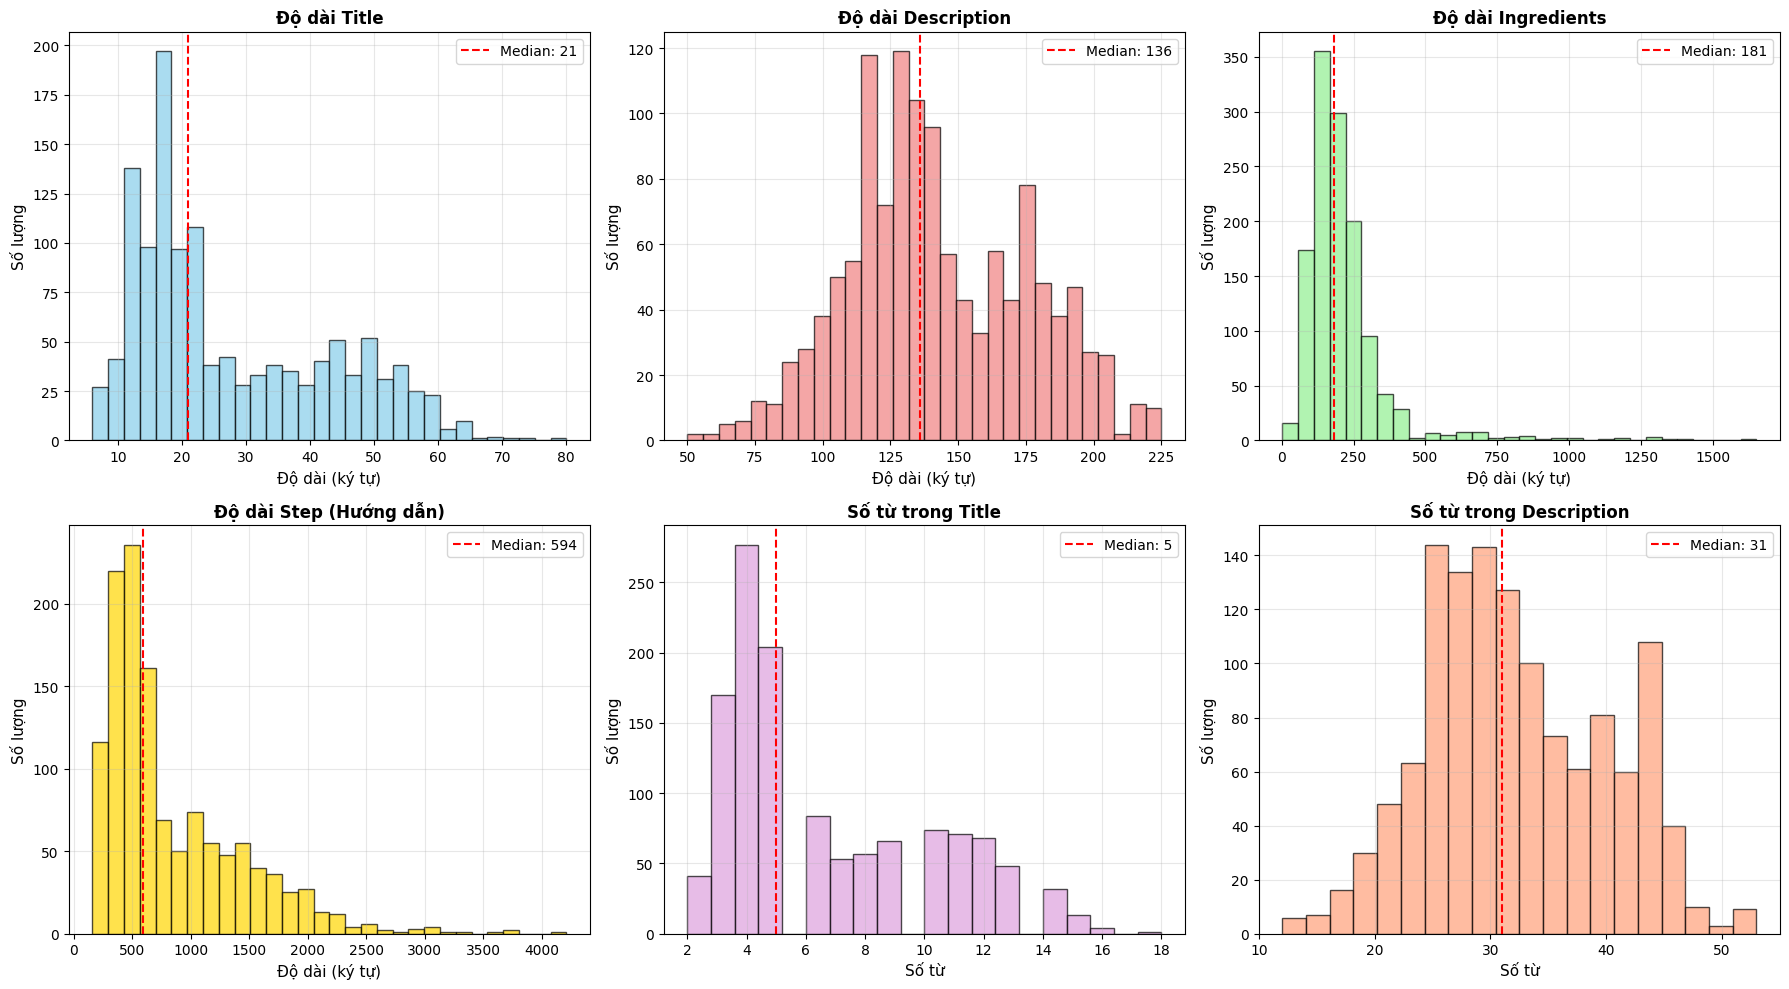

THỐNG KÊ ĐỘ DÀI TEXT

Title - Độ dài ký tự:
count    1263.000000
mean       27.484561
std        15.300515
min         6.000000
25%        16.000000
50%        21.000000
75%        40.000000
max        80.000000
Name: title_length, dtype: float64

Description - Độ dài ký tự:
count    1263.000000
mean      142.039588
std        33.391806
min        50.000000
25%       117.000000
50%       136.000000
75%       170.000000
max       225.000000
Name: description_length, dtype: float64

Ingredients - Độ dài ký tự:
count    1263.000000
mean      214.680918
std       154.479886
min         2.000000
25%       136.000000
50%       181.000000
75%       246.000000
max      1652.000000
Name: ingredients_length, dtype: float64

Step - Độ dài ký tự:
count    1263.000000
mean      837.653207
std       586.464687
min       158.000000
25%       422.000000
50%       594.000000
75%      1165.500000
max      4209.000000
Name: step_length, dtype: float64


In [10]:
# Tính độ dài văn bản
data['title_length'] = data['title'].fillna('').apply(len)
data['description_length'] = data['description'].fillna('').apply(len)
data['ingredients_length'] = data['ingredients'].fillna('').apply(len)
data['step_length'] = data['step'].fillna('').apply(len)

# Số từ trong mỗi field
data['title_words'] = data['title'].fillna('').apply(lambda x: len(x.split()))
data['description_words'] = data['description'].fillna('').apply(lambda x: len(x.split()))

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Title length
axes[0,0].hist(data['title_length'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0,0].set_xlabel('Độ dài (ký tự)', fontsize=11)
axes[0,0].set_ylabel('Số lượng', fontsize=11)
axes[0,0].set_title('Độ dài Title', fontsize=12, fontweight='bold')
axes[0,0].axvline(data['title_length'].median(), color='red', linestyle='--', label=f'Median: {data["title_length"].median():.0f}')
axes[0,0].legend()
axes[0,0].grid(alpha=0.3)

# Description length
axes[0,1].hist(data['description_length'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0,1].set_xlabel('Độ dài (ký tự)', fontsize=11)
axes[0,1].set_ylabel('Số lượng', fontsize=11)
axes[0,1].set_title('Độ dài Description', fontsize=12, fontweight='bold')
axes[0,1].axvline(data['description_length'].median(), color='red', linestyle='--', label=f'Median: {data["description_length"].median():.0f}')
axes[0,1].legend()
axes[0,1].grid(alpha=0.3)

# Ingredients length
axes[0,2].hist(data['ingredients_length'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0,2].set_xlabel('Độ dài (ký tự)', fontsize=11)
axes[0,2].set_ylabel('Số lượng', fontsize=11)
axes[0,2].set_title('Độ dài Ingredients', fontsize=12, fontweight='bold')
axes[0,2].axvline(data['ingredients_length'].median(), color='red', linestyle='--', label=f'Median: {data["ingredients_length"].median():.0f}')
axes[0,2].legend()
axes[0,2].grid(alpha=0.3)

# Step length
axes[1,0].hist(data['step_length'], bins=30, color='gold', edgecolor='black', alpha=0.7)
axes[1,0].set_xlabel('Độ dài (ký tự)', fontsize=11)
axes[1,0].set_ylabel('Số lượng', fontsize=11)
axes[1,0].set_title('Độ dài Step (Hướng dẫn)', fontsize=12, fontweight='bold')
axes[1,0].axvline(data['step_length'].median(), color='red', linestyle='--', label=f'Median: {data["step_length"].median():.0f}')
axes[1,0].legend()
axes[1,0].grid(alpha=0.3)

# Title words
axes[1,1].hist(data['title_words'], bins=20, color='plum', edgecolor='black', alpha=0.7)
axes[1,1].set_xlabel('Số từ', fontsize=11)
axes[1,1].set_ylabel('Số lượng', fontsize=11)
axes[1,1].set_title('Số từ trong Title', fontsize=12, fontweight='bold')
axes[1,1].axvline(data['title_words'].median(), color='red', linestyle='--', label=f'Median: {data["title_words"].median():.0f}')
axes[1,1].legend()
axes[1,1].grid(alpha=0.3)

# Description words
axes[1,2].hist(data['description_words'], bins=20, color='lightsalmon', edgecolor='black', alpha=0.7)
axes[1,2].set_xlabel('Số từ', fontsize=11)
axes[1,2].set_ylabel('Số lượng', fontsize=11)
axes[1,2].set_title('Số từ trong Description', fontsize=12, fontweight='bold')
axes[1,2].axvline(data['description_words'].median(), color='red', linestyle='--', label=f'Median: {data["description_words"].median():.0f}')
axes[1,2].legend()
axes[1,2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("="*80)
print("THỐNG KÊ ĐỘ DÀI TEXT")
print("="*80)
print(f"\nTitle - Độ dài ký tự:")
print(data['title_length'].describe())
print(f"\nDescription - Độ dài ký tự:")
print(data['description_length'].describe())
print(f"\nIngredients - Độ dài ký tự:")
print(data['ingredients_length'].describe())
print(f"\nStep - Độ dài ký tự:")
print(data['step_length'].describe())

### 📊 Kết luận Phân tích Text Features

**Quan sát chính:**
- **Title**: Ngắn gọn (trung bình ~30-50 ký tự, 5-8 từ) → tốt cho quick matching
- **Description**: Vừa phải (~150-300 ký tự) → cung cấp context ngắn gọn
- **Ingredients**: Dài hơn → chứa nhiều thông tin về nguyên liệu
- **Step**: Rất dài → chứa hướng dẫn chi tiết

**Ý nghĩa cho Content-Based RS:**
- **Title + Description**: Dùng cho TF-IDF hoặc sentence embeddings (BERT, PhoBERT)
- **Ingredients**: Feature CỰC KỲ QUAN TRỌNG - nên parse thành list và dùng cho similarity matching
- **Step**: Có thể bỏ qua hoặc dùng cho advanced RS (vì quá dài, nhiễu)

**Recommendation cho LLM-based RS:**
- Concatenate: `title + description + ingredients` → làm input cho LLM embeddings
- Hoặc dùng riêng từng field và ensemble kết quả

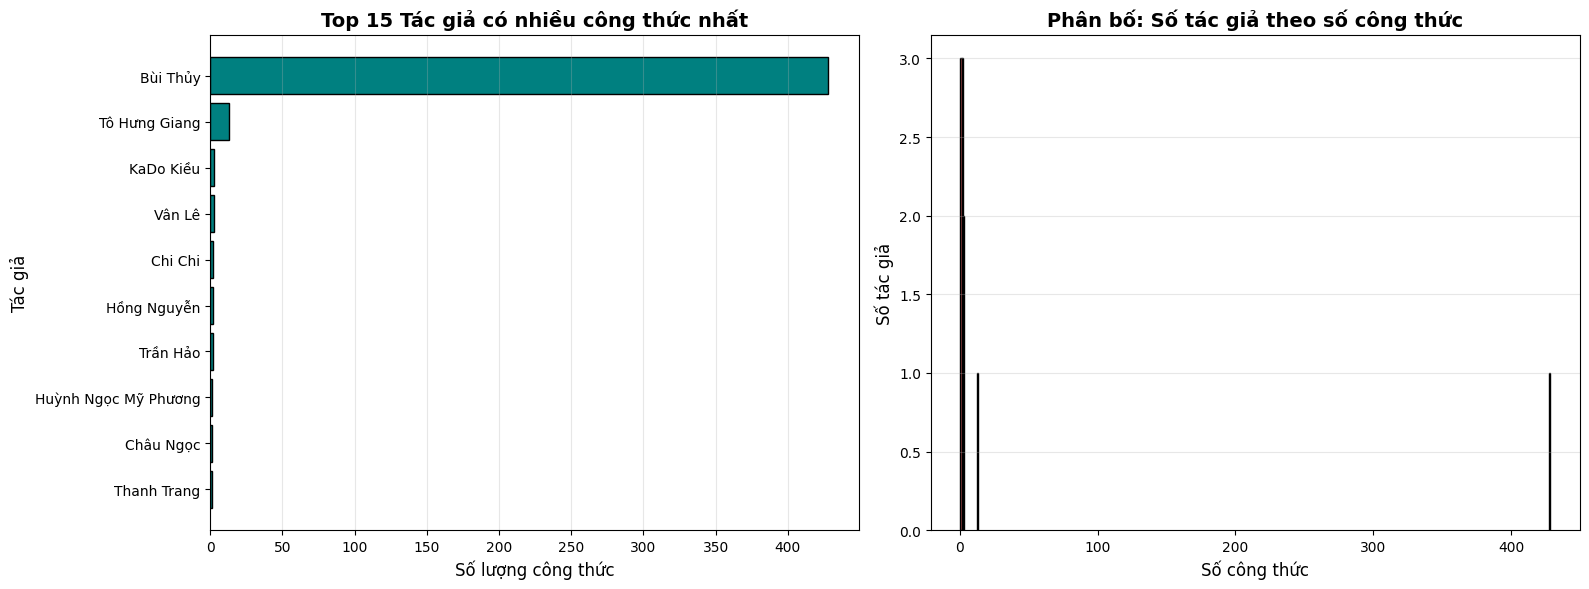

THỐNG KÊ TÁC GIẢ

Tổng số tác giả: 10

Top 10 tác giả:
author_name
Bùi Thủy                428
Tô Hưng Giang            13
KaDo Kiều                 3
Vân Lê                    3
Chi Chi                   2
Hồng Nguyễn               2
Trần Hảo                  2
Huỳnh Ngọc Mỹ Phương      1
Châu Ngọc                 1
Thanh Trang               1
Name: count, dtype: int64


In [11]:
# Phân tích tác giả
author_counts = data['author_name'].value_counts().head(15)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top authors
axes[0].barh(author_counts.index[::-1], author_counts.values[::-1], color='teal', edgecolor='black')
axes[0].set_xlabel('Số lượng công thức', fontsize=12)
axes[0].set_ylabel('Tác giả', fontsize=12)
axes[0].set_title('Top 15 Tác giả có nhiều công thức nhất', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Phân bố số công thức/tác giả
author_recipe_dist = data['author_name'].value_counts().value_counts().sort_index()
axes[1].bar(author_recipe_dist.index, author_recipe_dist.values, color='indianred', edgecolor='black')
axes[1].set_xlabel('Số công thức', fontsize=12)
axes[1].set_ylabel('Số tác giả', fontsize=12)
axes[1].set_title('Phân bố: Số tác giả theo số công thức', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("="*80)
print("THỐNG KÊ TÁC GIẢ")
print("="*80)
print(f"\nTổng số tác giả: {data['author_name'].nunique()}")
print(f"\nTop 10 tác giả:")
print(author_counts.head(10))

## 5. Phân tích Thời gian

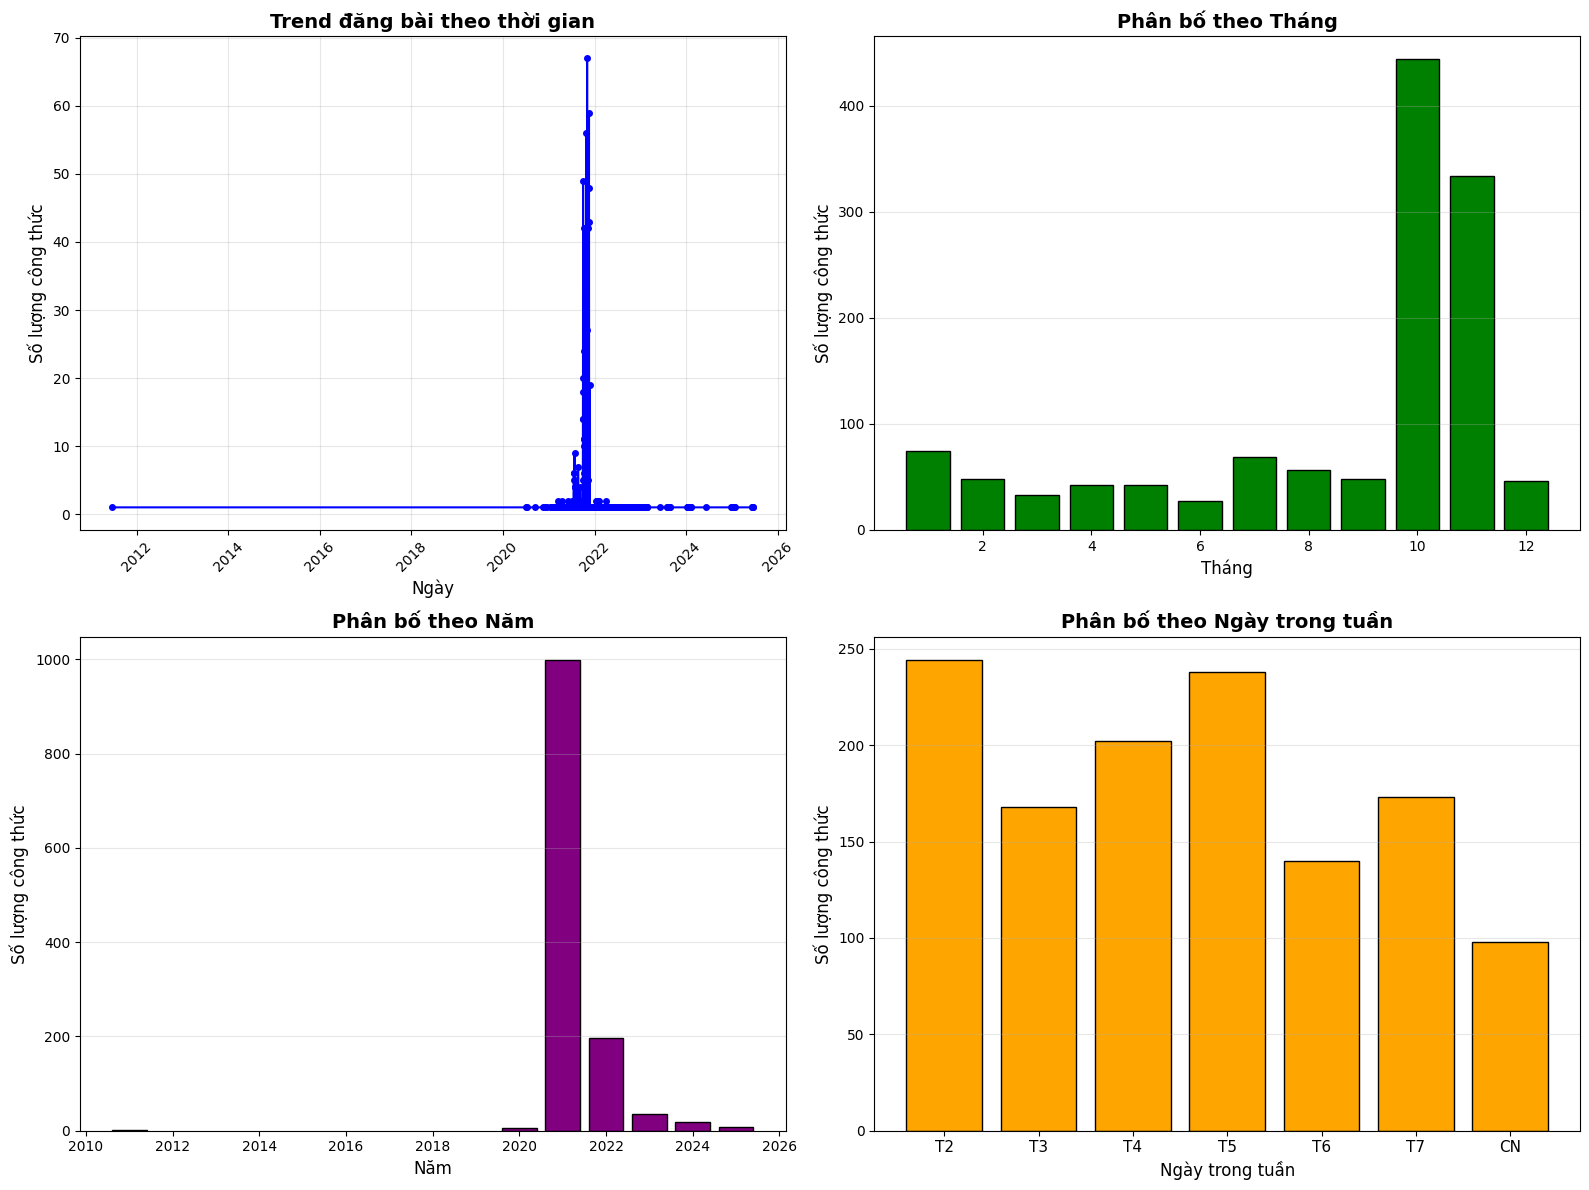

THỐNG KÊ THỜI GIAN

Khoảng thời gian: 2011-06-18 00:00:00 đến 2025-06-22 00:00:00

Top 5 ngày có nhiều bài nhất:
parsed_date
2021-11-03    67
2021-11-18    59
2021-10-26    56
2021-10-02    49
2021-11-15    48
dtype: int64


In [12]:
# Parse post_date
import re
from datetime import datetime

def parse_date(date_str):
    try:
        # Extract date part before comma
        match = re.search(r'(\d{1,2}/\d{1,2}/\d{4})', str(date_str))
        if match:
            date_part = match.group(1)
            return pd.to_datetime(date_part, format='%d/%m/%Y')
    except:
        pass
    return None

data['parsed_date'] = data['post_date'].apply(parse_date)
data_with_date = data[data['parsed_date'].notna()].copy()

if len(data_with_date) > 0:
    data_with_date['year'] = data_with_date['parsed_date'].dt.year
    data_with_date['month'] = data_with_date['parsed_date'].dt.month
    data_with_date['day_of_week'] = data_with_date['parsed_date'].dt.day_name()
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Trend theo thời gian
    date_counts = data_with_date.groupby('parsed_date').size().sort_index()
    axes[0,0].plot(date_counts.index, date_counts.values, marker='o', linestyle='-', color='blue', markersize=4)
    axes[0,0].set_xlabel('Ngày', fontsize=12)
    axes[0,0].set_ylabel('Số lượng công thức', fontsize=12)
    axes[0,0].set_title('Trend đăng bài theo thời gian', fontsize=14, fontweight='bold')
    axes[0,0].grid(alpha=0.3)
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # Theo tháng
    month_counts = data_with_date['month'].value_counts().sort_index()
    axes[0,1].bar(month_counts.index, month_counts.values, color='green', edgecolor='black')
    axes[0,1].set_xlabel('Tháng', fontsize=12)
    axes[0,1].set_ylabel('Số lượng công thức', fontsize=12)
    axes[0,1].set_title('Phân bố theo Tháng', fontsize=14, fontweight='bold')
    axes[0,1].grid(axis='y', alpha=0.3)
    
    # Theo năm
    year_counts = data_with_date['year'].value_counts().sort_index()
    axes[1,0].bar(year_counts.index, year_counts.values, color='purple', edgecolor='black')
    axes[1,0].set_xlabel('Năm', fontsize=12)
    axes[1,0].set_ylabel('Số lượng công thức', fontsize=12)
    axes[1,0].set_title('Phân bố theo Năm', fontsize=14, fontweight='bold')
    axes[1,0].grid(axis='y', alpha=0.3)
    
    # Theo ngày trong tuần
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_counts = data_with_date['day_of_week'].value_counts().reindex(day_order, fill_value=0)
    axes[1,1].bar(range(len(day_counts)), day_counts.values, color='orange', edgecolor='black')
    axes[1,1].set_xticks(range(len(day_counts)))
    axes[1,1].set_xticklabels(['T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'CN'], fontsize=11)
    axes[1,1].set_xlabel('Ngày trong tuần', fontsize=12)
    axes[1,1].set_ylabel('Số lượng công thức', fontsize=12)
    axes[1,1].set_title('Phân bố theo Ngày trong tuần', fontsize=14, fontweight='bold')
    axes[1,1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("="*80)
    print("THỐNG KÊ THỜI GIAN")
    print("="*80)
    print(f"\nKhoảng thời gian: {data_with_date['parsed_date'].min()} đến {data_with_date['parsed_date'].max()}")
    print(f"\nTop 5 ngày có nhiều bài nhất:")
    print(date_counts.nlargest(5))
else:
    print("Không thể parse date từ dữ liệu")

## 6. Phân tích Nguyên liệu (CỰC KỲ QUAN TRỌNG cho Content-Based RS)

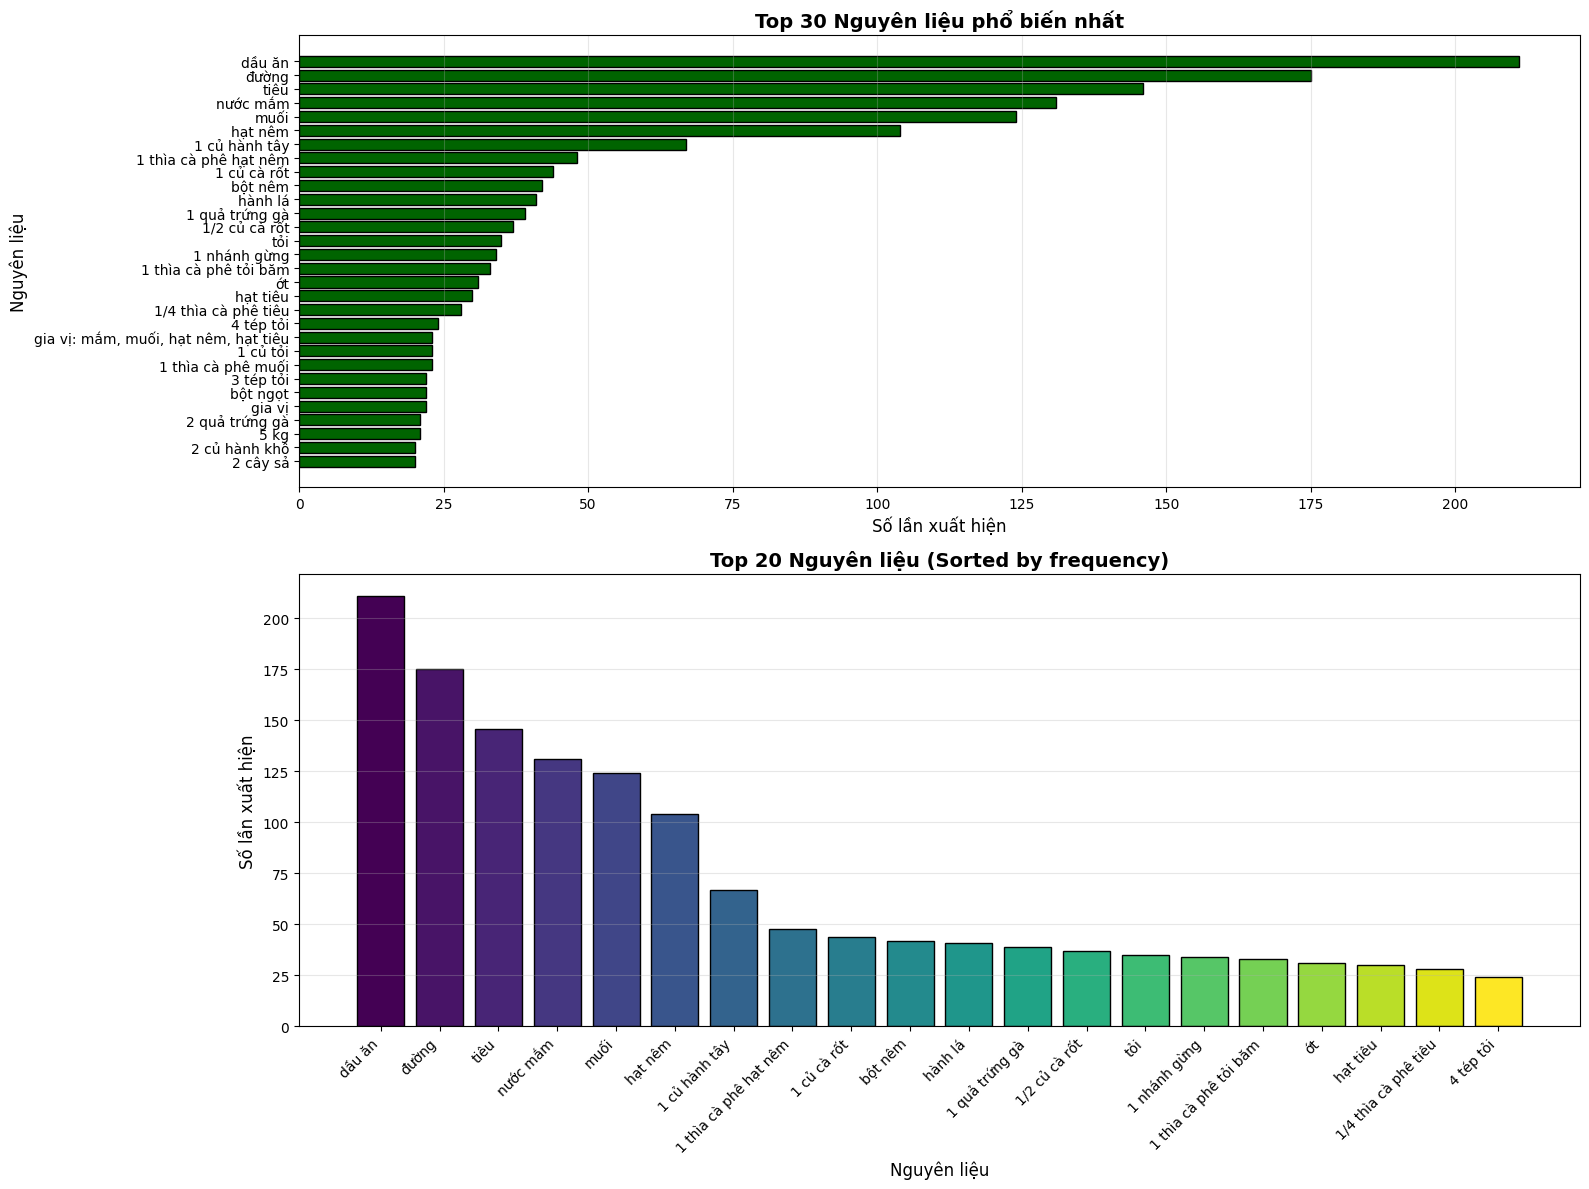

THỐNG KÊ NGUYÊN LIỆU

Tổng số nguyên liệu unique: 5839
Tổng số lần nguyên liệu được sử dụng: 11277

Top 15 nguyên liệu phổ biến:
1. dầu ăn: 211 lần
2. đường: 175 lần
3. tiêu: 146 lần
4. nước mắm: 131 lần
5. muối: 124 lần
6. hạt nêm: 104 lần
7. 1 củ hành tây: 67 lần
8. 1 thìa cà phê hạt nêm: 48 lần
9. 1 củ cà rốt: 44 lần
10. bột nêm: 42 lần
11. hành lá: 41 lần
12. 1 quả trứng gà: 39 lần
13. 1/2 củ cà rốt: 37 lần
14. tỏi: 35 lần
15. 1 nhánh gừng: 34 lần


In [13]:
# Parse ingredients từ string list
import ast
from collections import Counter

def parse_ingredients(ing_str):
    try:
        if pd.isna(ing_str) or ing_str == '[]':
            return []
        # Parse string representation of list
        ing_list = ast.literal_eval(ing_str)
        # Extract ingredient names (lowercase, remove quantities)
        ingredients = []
        for item in ing_list:
            # Simple cleaning: lowercase
            ingredients.append(item.lower().strip())
        return ingredients
    except:
        return []

data['ingredients_list'] = data['ingredients'].apply(parse_ingredients)

# Flatten all ingredients
all_ingredients = []
for ing_list in data['ingredients_list']:
    all_ingredients.extend(ing_list)

# Count most common ingredients
ingredient_counter = Counter(all_ingredients)
top_ingredients = ingredient_counter.most_common(30)

# Visualization
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Top 30 ingredients
ing_names = [ing[0] for ing in top_ingredients]
ing_counts = [ing[1] for ing in top_ingredients]

axes[0].barh(ing_names[::-1], ing_counts[::-1], color='darkgreen', edgecolor='black')
axes[0].set_xlabel('Số lần xuất hiện', fontsize=12)
axes[0].set_ylabel('Nguyên liệu', fontsize=12)
axes[0].set_title('Top 30 Nguyên liệu phổ biến nhất', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Word cloud-style: Top 20
top_20 = ingredient_counter.most_common(20)
ing_20_names = [ing[0][:30] for ing in top_20]  # Truncate long names
ing_20_counts = [ing[1] for ing in top_20]

colors_20 = plt.cm.viridis(np.linspace(0, 1, 20))
axes[1].bar(range(len(ing_20_names)), ing_20_counts, color=colors_20, edgecolor='black')
axes[1].set_xticks(range(len(ing_20_names)))
axes[1].set_xticklabels(ing_20_names, rotation=45, ha='right', fontsize=10)
axes[1].set_xlabel('Nguyên liệu', fontsize=12)
axes[1].set_ylabel('Số lần xuất hiện', fontsize=12)
axes[1].set_title('Top 20 Nguyên liệu (Sorted by frequency)', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("="*80)
print("THỐNG KÊ NGUYÊN LIỆU")
print("="*80)
print(f"\nTổng số nguyên liệu unique: {len(ingredient_counter)}")
print(f"Tổng số lần nguyên liệu được sử dụng: {sum(ingredient_counter.values())}")
print(f"\nTop 15 nguyên liệu phổ biến:")
for i, (ing, count) in enumerate(top_ingredients[:15], 1):
    print(f"{i}. {ing}: {count} lần")

### 📊 Kết luận Phân tích Nguyên liệu

**Quan sát quan trọng:**
- Nguyên liệu phổ biến: muối, đường, hành, tỏi, nước mắm, dầu ăn... (gia vị cơ bản)
- Có sự đa dạng lớn về nguyên liệu (>500 unique ingredients)

**Ý nghĩa CỰC KỲ QUAN TRỌNG cho Content-Based RS:**

1. **Ingredient-based Similarity**:
   - Tính Jaccard similarity giữa các công thức dựa trên nguyên liệu chung
   - Ví dụ: Recipe A có [thịt gà, nấm, hành] → recommend Recipe B có [thịt gà, nấm, tỏi]

2. **TF-IDF trên Ingredients**:
   - Xem mỗi ingredient như một "từ"
   - Tính TF-IDF vector cho mỗi recipe
   - Cosine similarity giữa các vectors

3. **Ingredient Substitution**:
   - Nếu user thiếu nguyên liệu X → recommend món dùng nguyên liệu thay thế Y

4. **Dietary Filtering**:
   - Filter món chay (không có thịt/hải sản)
   - Filter món ít calo (dựa vào calories + ingredients)

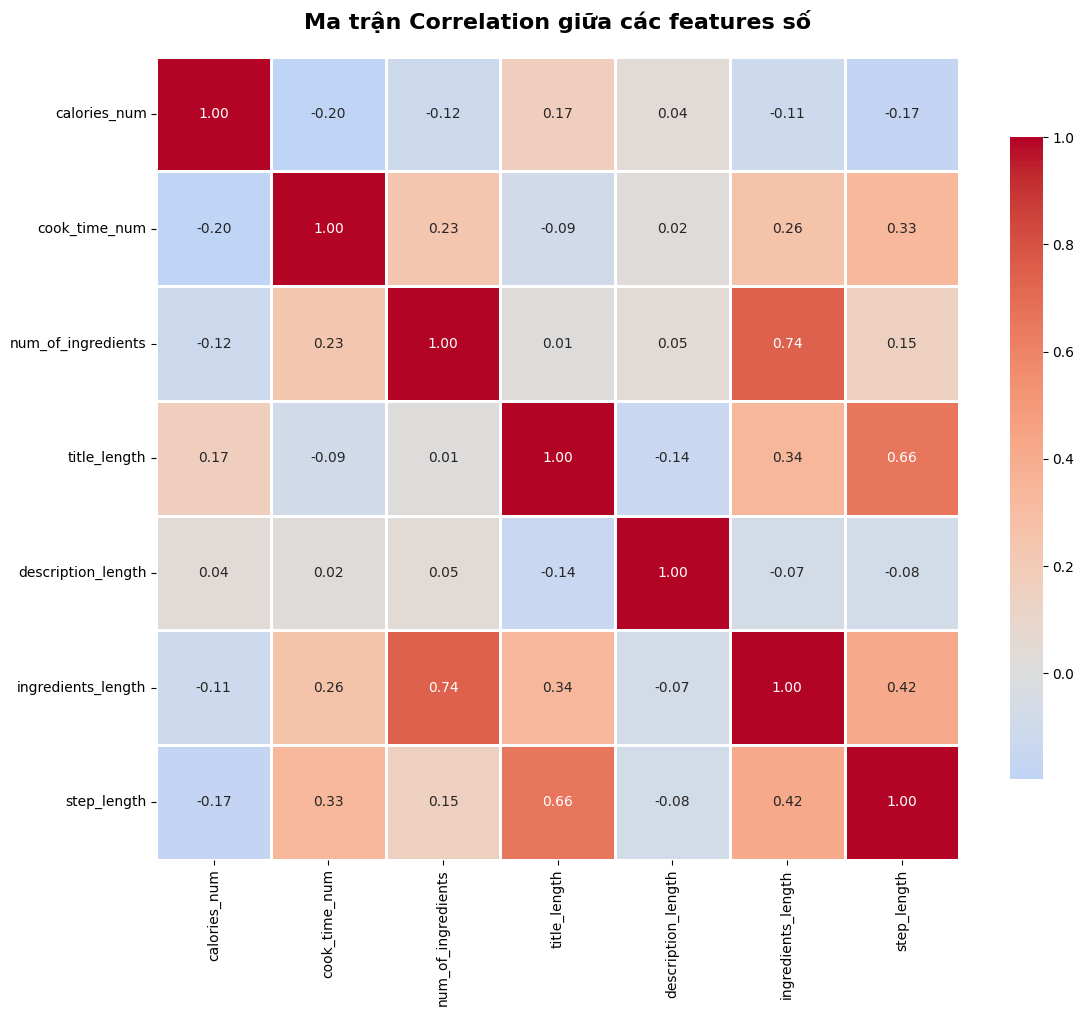

CORRELATION INSIGHTS

Mối tương quan mạnh (|r| > 0.5):
  - num_of_ingredients <-> ingredients_length: 0.745
  - title_length <-> step_length: 0.659


In [14]:
# Correlation matrix
numeric_cols = ['calories_num', 'cook_time_num', 'num_of_ingredients', 'num_of_people_num', 
                'title_length', 'description_length', 'ingredients_length', 'step_length']

# Lọc các cột tồn tại
existing_cols = [col for col in numeric_cols if col in data.columns]
corr_matrix = data[existing_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Ma trận Correlation giữa các features số', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("="*80)
print("CORRELATION INSIGHTS")
print("="*80)
print("\nMối tương quan mạnh (|r| > 0.5):")
for i in range(len(corr_matrix)):
    for j in range(i+1, len(corr_matrix)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            print(f"  - {corr_matrix.index[i]} <-> {corr_matrix.columns[j]}: {corr_val:.3f}")

---

# 🎯 TỔNG KẾT VÀ ĐỀ XUẤT CHO RECOMMENDER SYSTEM

## A. Content-Based Filtering Approach

### 1. **TF-IDF Based Recommendation**
**Features sử dụng:**
- Concatenate: `title + description + ingredients (as text)`
- Tính TF-IDF vectors
- Cosine similarity giữa các recipes

**Ưu điểm:**
- Đơn giản, nhanh, dễ implement
- Không cần user interaction data
- Giải thích được (interpretable)

**Code suggestion:**
```python
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Combine text features
data['combined_text'] = (
    data['title'].fillna('') + ' ' + 
    data['description'].fillna('') + ' ' + 
    data['ingredients'].fillna('').str.replace('[', '').str.replace(']', '').str.replace("'", '')
)

# TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['combined_text'])

# Cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Recommend function
def recommend(recipe_idx, top_n=10):
    sim_scores = list(enumerate(cosine_sim[recipe_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    recipe_indices = [i[0] for i in sim_scores]
    return data.iloc[recipe_indices][['title', 'description']]
```

---

### 2. **Ingredient-Based Recommendation (Jaccard Similarity)**
**Features sử dụng:**
- `ingredients_list` (đã parse)

**Approach:**
- Tính Jaccard similarity: `J(A,B) = |A ∩ B| / |A ∪ B|`
- Recommend recipes có ingredients tương tự

**Code suggestion:**
```python
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import MultiLabelBinarizer

# Binarize ingredients
mlb = MultiLabelBinarizer()
ingredients_binary = mlb.fit_transform(data['ingredients_list'])

# Jaccard similarity
from sklearn.metrics.pairwise import pairwise_distances
jaccard_sim = 1 - pairwise_distances(ingredients_binary, metric='jaccard')

def recommend_by_ingredients(recipe_idx, top_n=10):
    sim_scores = list(enumerate(jaccard_sim[recipe_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    recipe_indices = [i[0] for i in sim_scores]
    return data.iloc[recipe_indices][['title', 'ingredients']]
```

---

### 3. **Hybrid Approach (Weighted Combination)**
**Combine:**
- Text similarity (TF-IDF) - weight: 0.4
- Ingredient similarity (Jaccard) - weight: 0.4
- Metadata similarity (calories, cook_time, type_of_food) - weight: 0.2

**Code suggestion:**
```python
# Normalize similarities
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
text_sim_norm = scaler.fit_transform(cosine_sim)
ingredient_sim_norm = scaler.fit_transform(jaccard_sim)

# Metadata similarity (simple: same type_of_food)
type_match = (data['type_of_food'].values[:, None] == data['type_of_food'].values).astype(float)

# Weighted hybrid
hybrid_sim = (0.4 * text_sim_norm + 
              0.4 * ingredient_sim_norm + 
              0.2 * type_match)

def recommend_hybrid(recipe_idx, top_n=10):
    sim_scores = list(enumerate(hybrid_sim[recipe_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    recipe_indices = [i[0] for i in sim_scores]
    return data.iloc[recipe_indices][['title', 'type_of_food', 'calories', 'cook_time']]
```

---

## B. LLM-Based Approach

### 1. **Sentence Embeddings (PhoBERT, Sentence-BERT)**
**Approach:**
- Dùng pre-trained LLM để tạo embeddings cho `title + description`
- Cosine similarity trên embedding space
- Tốt hơn TF-IDF vì capture semantic meaning

**Code suggestion:**
```python
from sentence_transformers import SentenceTransformer

# Load model (PhoBERT cho tiếng Việt hoặc multilingual model)
model = SentenceTransformer('keepitreal/vietnamese-sbert')

# Combine text
data['combined_text'] = data['title'] + '. ' + data['description']

# Generate embeddings
embeddings = model.encode(data['combined_text'].tolist(), show_progress_bar=True)

# Cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
embedding_sim = cosine_similarity(embeddings)

def recommend_llm(recipe_idx, top_n=10):
    sim_scores = list(enumerate(embedding_sim[recipe_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    recipe_indices = [i[0] for i in sim_scores]
    return data.iloc[recipe_indices][['title', 'description']]
```

**Recommended models:**
- `keepitreal/vietnamese-sbert` (cho tiếng Việt)
- `paraphrase-multilingual-mpnet-base-v2` (multilingual)
- `all-MiniLM-L6-v2` (fast, English-focused nhưng có thể work)

---

### 2. **LLM-Based Reranking**
**Approach:**
- Dùng content-based để lấy top-50 candidates
- Dùng LLM (GPT, Claude, Gemini) để rerank dựa trên user query/preference

**Example with OpenAI:**
```python
import openai

def llm_rerank(user_query, candidate_recipes, top_n=10):
    prompt = f'''
    User query: {user_query}
    
    Rank the following recipes based on relevance:
    {candidate_recipes.to_json(orient='records')}
    
    Return top {top_n} recipe indices (0-indexed).
    '''
    
    response = openai.ChatCompletion.create(
        model='gpt-4',
        messages=[{'role': 'user', 'content': prompt}]
    )
    
    # Parse response and return top recipes
    ...
```

---

## C. Feature Engineering for Advanced RS

### **Additional Features to Create:**

1. **Complexity Score**: 
   - `(num_of_ingredients * cook_time_num) / 1000`
   - Món phức tạp vs đơn giản

2. **Health Score**:
   - Based on calories, ingredients (vegetable count, meat count)
   - `health_score = -0.001 * calories + 0.5 * vegetable_count`

3. **Popularity Score** (if có user interaction):
   - Number of views, likes, saves

4. **Ingredient Categories**:
   - Extract: protein (thịt, cá), carbs (gạo, bún), veggies (rau)
   - Create binary features: `has_meat`, `has_seafood`, `is_vegetarian`

5. **Cuisine Type** (if can extract):
   - Vietnamese, Chinese, Japanese, Western...

---

## D. Evaluation Metrics

### Nếu có user interaction data:
- **Precision@K, Recall@K**: Top-K recommendations có bao nhiêu relevant
- **NDCG@K**: Normalized Discounted Cumulative Gain
- **MRR**: Mean Reciprocal Rank

### Nếu không có interaction data (cold start):
- **Diversity**: Đảm bảo recommendations đa dạng (không recommend toàn món giống nhau)
- **Coverage**: Bao nhiêu % recipes được recommend ít nhất 1 lần
- **Manual evaluation**: Sample và đánh giá thủ công

---

## E. Next Steps

1. ✅ **EDA Done** - Hiểu dữ liệu
2. **Preprocessing**: Clean text, parse ingredients, normalize features
3. **Implement Baseline**: TF-IDF + Cosine Similarity
4. **Improve**: Try Jaccard Similarity, Hybrid approach
5. **Advanced**: Implement LLM-based (PhoBERT embeddings)
6. **Evaluate**: Manual evaluation or A/B test
7. **Deploy**: API endpoint hoặc web app (Streamlit, Flask)

### 📊 Kết luận Correlation Analysis

**Quan sát:**
- `num_of_ingredients` có thể có correlation với `calories` (nhiều nguyên liệu → calories cao hơn)
- `cook_time` có thể correlation với `step_length` (nhiều bước → lâu hơn)
- Các features text (title_length, description_length...) ít correlation với nhau

**Ý nghĩa:**
- Không có multicollinearity nghiêm trọng → có thể dùng cả features cho model
- Nếu có correlation cao → cần feature selection hoặc PCA

## 7. Correlation Analysis (Kiểm tra mối quan hệ giữa các features số)

### 📊 Kết luận Phân tích Thời gian

**Quan sát:**
- Dataset tập trung vào tháng 1 (Tháng Tết) → phù hợp với chủ đề "Món Tết"
- Có trend tăng mạnh vào giai đoạn trước Tết

**Ý nghĩa cho RS:**
- **Seasonal recommendation**: Có thể recommend món theo mùa/dịp lễ
- **Trending items**: Món được đăng gần đây có thể được ưu tiên (recency bias)

### 📊 Kết luận Phân tích Tác giả

**Quan sát:**
- Có một số tác giả đóng góp nhiều công thức (có thể là editor chuyên nghiệp)
- Đa số tác giả chỉ có 1-3 công thức

**Ý nghĩa cho RS:**
- **Author-based filtering**: Có thể recommend các món khác của cùng tác giả
- **Collaborative signal**: Nếu user thích món của tác giả A, có thể recommend món khác của A

## 4. Phân tích Tác giả

## 3. Phân tích Text Features (Quan trọng cho Content-Based RS)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Admin\AppData\Local\Temp\ipykernel_15020\1907617251.py:2: SyntaxWarning: invalid escape sequence '\d'
  data['num_of_people_num'] = data['num_of_people'].str.extract('(\d+)').astype(float)


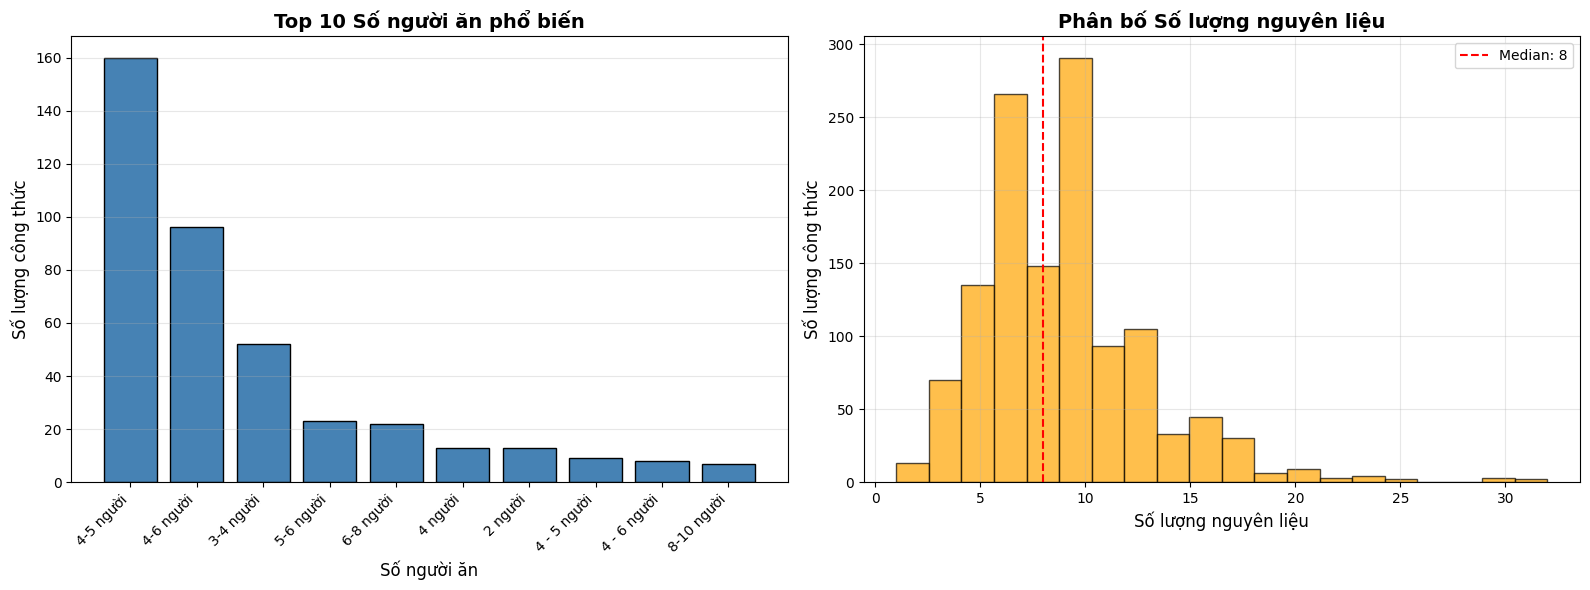


Số nguyên liệu:
count    1258.000000
mean        8.964229
std         3.914905
min         1.000000
25%         6.000000
50%         8.000000
75%        11.000000
max        32.000000
Name: num_of_ingredients, dtype: float64


In [15]:
# Phân tích số người ăn và số nguyên liệu
data['num_of_people_num'] = data['num_of_people'].str.extract('(\d+)').astype(float)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Số người ăn
people_counts = data['num_of_people'].value_counts().head(10)
axes[0].bar(range(len(people_counts)), people_counts.values, color='steelblue', edgecolor='black')
axes[0].set_xticks(range(len(people_counts)))
axes[0].set_xticklabels(people_counts.index, rotation=45, ha='right')
axes[0].set_xlabel('Số người ăn', fontsize=12)
axes[0].set_ylabel('Số lượng công thức', fontsize=12)
axes[0].set_title('Top 10 Số người ăn phổ biến', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Số nguyên liệu
axes[1].hist(data['num_of_ingredients'], bins=20, color='orange', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Số lượng nguyên liệu', fontsize=12)
axes[1].set_ylabel('Số lượng công thức', fontsize=12)
axes[1].set_title('Phân bố Số lượng nguyên liệu', fontsize=14, fontweight='bold')
axes[1].axvline(data['num_of_ingredients'].median(), color='red', linestyle='--', 
                label=f'Median: {data["num_of_ingredients"].median():.0f}')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nSố nguyên liệu:")
print(data['num_of_ingredients'].describe())

## 2. Phân tích Phân phối Món ăn

In [16]:
# Kiểm tra duplicates
print("="*80)
print("DUPLICATE RECORDS")
print("="*80)
print(f"Số lượng bản ghi trùng lặp: {data.duplicated().sum()}")
print(f"Số lượng title trùng lặp: {data['title'].duplicated().sum()}")
print(f"Số lượng link trùng lặp: {data['link'].duplicated().sum()}")

DUPLICATE RECORDS


TypeError: unhashable type: 'list'

In [ ]:
# Kiểm tra kiểu dữ liệu
print("\n" + "="*80)
print("KIỂU DỮ LIỆU CỦA CÁC CỘT")
print("="*80)
data.info()

## 1. Phân tích Cấu trúc Dữ liệu